### Conteudo Aula 4

- Técnicas de normalização com <b> StandardScaler e MinMaxScaler</b>
- Expressões condicionais
    <br><b>Pandas</b>
    <br>np.where(condição, valor_Se_verdadeiro, valor_se_falso)
    <br>.apply(lambda x: ...)
    <br>replace (antigo,novo)
    <br><b>Polars</b>
    <br>.when(condição).then(valor).otherwise(valor)
    <br>.map_elements(lambda x: ...)
    <br>.replace(antigo,novo)

#### Introdução da biblioteca Scikit-Learn

!pip install -U scikit-learn

In [1]:
""" normalization_exercises.py Exercícios de pré-processamento de dados:
1. Iris (StandardScaler e MinMaxScaler) 
2. California Housing (StandardScaler e MinMaxScaler) 
Pré-requisitos: pip install pandas polars scikit-learn matplotlib """ 

### Carregamento de bibliotecas
import pandas as pd 
import polars as pl 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### Teste de exercicios em separado


=== Iris – Estatísticas ===
Original:
                     mean    std  min  max
sepal length (cm)  5.843  0.828  4.3  7.9
sepal width (cm)   3.057  0.436  2.0  4.4
petal length (cm)  3.758  1.765  1.0  6.9
petal width (cm)   1.199  0.762  0.1  2.5

StandardScaler:
                    mean    std    min    max
sepal length (cm)  -0.0  1.003 -1.870  2.492
sepal width (cm)   -0.0  1.003 -2.434  3.091
petal length (cm)  -0.0  1.003 -1.568  1.786
petal width (cm)   -0.0  1.003 -1.447  1.712

MinMaxScaler:
                     mean    std  min  max
sepal length (cm)  0.429  0.230  0.0  1.0
sepal width (cm)   0.441  0.182  0.0  1.0
petal length (cm)  0.467  0.299  0.0  1.0
petal width (cm)   0.458  0.318  0.0  1.0


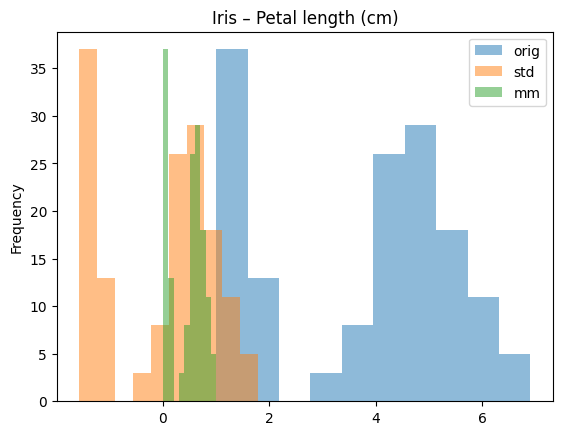

In [5]:
# =================== # Exercício 1 – Iris # ==================== 
from sklearn.datasets import load_iris 


"""Normalização do dataset Iris e comparação estatística/visual."""

# 1. Carregar Iris em pandas 
iris_pd = load_iris(as_frame=True).frame

#print("\n=== Iris – Carregamento ===")
#print(iris_pd)

# 2. Converter para polars e voltar (round-trip) - opcional limpeza de dados
iris_pl = pl.from_pandas(iris_pd) 
iris_pd = iris_pl.to_pandas() 

# 3. Features numéricas 
X = iris_pd.drop(columns="target") 

# 4. StandardScaler 
X_std = pd.DataFrame( 
            StandardScaler().fit_transform(X), 
            columns=X.columns ) 

# 5. MinMaxScaler
X_mm = pd.DataFrame( 
                    MinMaxScaler().fit_transform(X),
                    columns=X.columns )

# 6. Estatísticas descritivas
print("\n=== Iris – Estatísticas ===") 

def resumo(df): 
    return df.describe().T[["mean", "std", "min", "max"]] 

print("Original:\n", resumo(X).round(3)) 
print("\nStandardScaler:\n", resumo(X_std).round(3)) 
print("\nMinMaxScaler:\n", resumo(X_mm).round(3)) 

# 7. Histograma da feature 'petal length (cm)'
plt.figure() 
X['petal length (cm)'].plot(kind="hist", alpha=.5, label="orig")
X_std['petal length (cm)'].plot(kind="hist", alpha=.5, label="std") 
X_mm['petal length (cm)'].plot(kind="hist", alpha=.5, label="mm")
plt.title("Iris – Petal length (cm)") 
plt.legend() 
plt.show()


=== California – Estatísticas ===
Original:
                 mean       std    min        max
MedInc         3.871     1.900  0.500     15.000
HouseAge      28.639    12.586  1.000     52.000
AveRooms       5.429     2.474  0.846    141.909
AveBedrms      1.097     0.474  0.333     34.067
Population  1425.477  1132.462  3.000  35682.000

StandardScaler:
             mean  std    min     max
MedInc       0.0  1.0 -1.774   5.858
HouseAge     0.0  1.0 -2.196   1.856
AveRooms     0.0  1.0 -1.852  55.163
AveBedrms   -0.0  1.0 -1.611  69.572
Population  -0.0  1.0 -1.256  30.250

MinMaxScaler:
              mean    std  min  max
MedInc      0.232  0.131  0.0  1.0
HouseAge    0.542  0.247  0.0  1.0
AveRooms    0.032  0.018  0.0  1.0
AveBedrms   0.023  0.014  0.0  1.0
Population  0.040  0.032  0.0  1.0


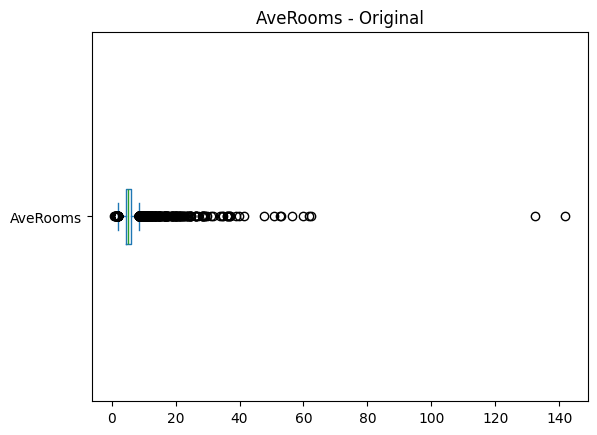

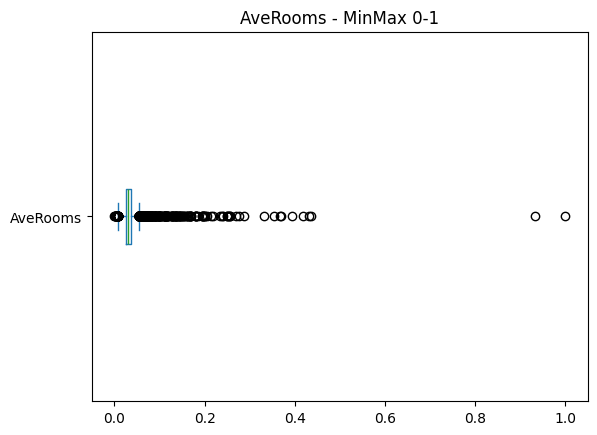

In [3]:
# =================== # Exercício 2 – California Housing # ==================== 
from sklearn.datasets import fetch_california_housing

"""Normalização do dataset California Housing e comparação estatística/visual."""

# 1. Carregar California Housing em pandas 
cal_pd = fetch_california_housing(as_frame=True).frame

# 2. Converter para polars e voltar (round-trip) - opcional limpeza de dados
cal_pl = pl.from_pandas(cal_pd) 
cal_pd = cal_pl.to_pandas()

# 3. Features numéricas 
X = cal_pd.drop(columns="MedHouseVal")

# 4. StandardScaler 
X_std = pd.DataFrame( 
            StandardScaler().fit_transform(X), 
            columns=X.columns ) 

# 5. MinMaxScaler
X_mm = pd.DataFrame( 
                    MinMaxScaler().fit_transform(X),
                    columns=X.columns )

# 6. Estatísticas descritivas
print("\n=== California – Estatísticas ===") 

def resumo(df): 
    return df.describe().T[["mean", "std", "min", "max"]]    

print("Original:\n", resumo(X).round(3).head()) 
print("\nStandardScaler:\n", resumo(X_std).round(3).head()) 
print("\nMinMaxScaler:\n", resumo(X_mm).round(3).head()) 


# 7. Boxplot da feature 'AveRooms'
plt.figure() 
X['AveRooms'].plot(kind="box", vert=False, title="AveRooms - Original")
plt.figure()
X_mm['AveRooms'].plot(kind="box", vert=False, title="AveRooms - MinMax 0-1") 
plt.show()

#### 2 Exercicios em conjunto


=== Iris – Estatísticas ===
Original:
                     mean    std  min  max
sepal length (cm)  5.843  0.828  4.3  7.9
sepal width (cm)   3.057  0.436  2.0  4.4
petal length (cm)  3.758  1.765  1.0  6.9
petal width (cm)   1.199  0.762  0.1  2.5

StandardScaler:
                    mean    std    min    max
sepal length (cm)  -0.0  1.003 -1.870  2.492
sepal width (cm)   -0.0  1.003 -2.434  3.091
petal length (cm)  -0.0  1.003 -1.568  1.786
petal width (cm)   -0.0  1.003 -1.447  1.712

MinMaxScaler:
                     mean    std  min  max
sepal length (cm)  0.429  0.230  0.0  1.0
sepal width (cm)   0.441  0.182  0.0  1.0
petal length (cm)  0.467  0.299  0.0  1.0
petal width (cm)   0.458  0.318  0.0  1.0


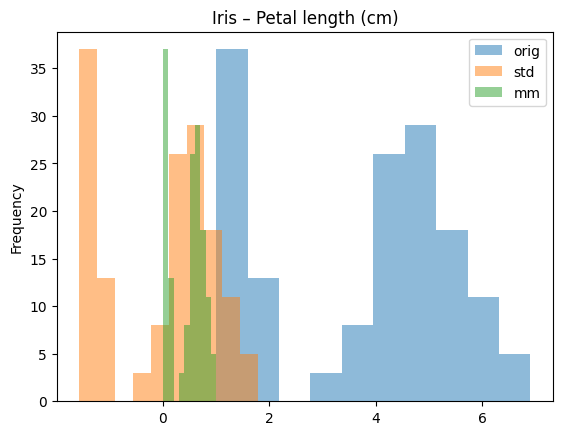


=== California – Estatísticas ===
Original:
                 mean       std    min        max
MedInc         3.871     1.900  0.500     15.000
HouseAge      28.639    12.586  1.000     52.000
AveRooms       5.429     2.474  0.846    141.909
AveBedrms      1.097     0.474  0.333     34.067
Population  1425.477  1132.462  3.000  35682.000

StandardScaler:
             mean  std    min     max
MedInc       0.0  1.0 -1.774   5.858
HouseAge     0.0  1.0 -2.196   1.856
AveRooms     0.0  1.0 -1.852  55.163
AveBedrms   -0.0  1.0 -1.611  69.572
Population  -0.0  1.0 -1.256  30.250

MinMaxScaler:
              mean    std  min  max
MedInc      0.232  0.131  0.0  1.0
HouseAge    0.542  0.247  0.0  1.0
AveRooms    0.032  0.018  0.0  1.0
AveBedrms   0.023  0.014  0.0  1.0
Population  0.040  0.032  0.0  1.0


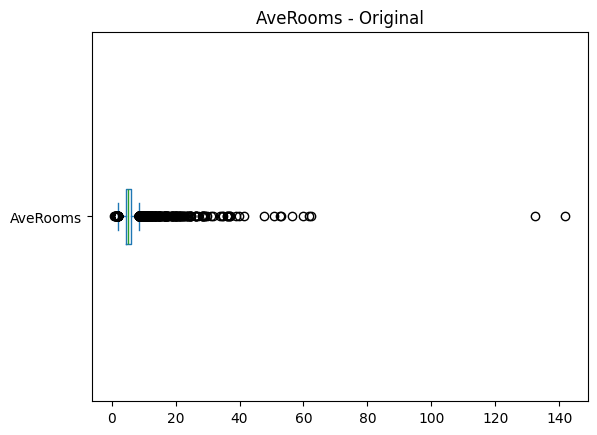

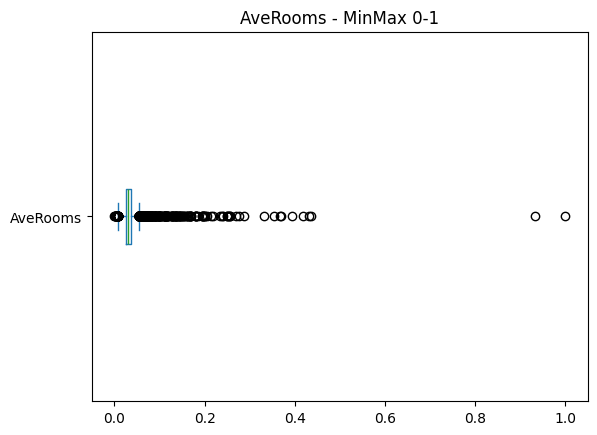

In [4]:
# =================== # Exercício 1 – Iris # ==================== 
from sklearn.datasets import load_iris 

def exercicio_iris(): 
    """Normalização do dataset Iris e comparação estatística/visual."""
    
    # 1. Carregar Iris em pandas 
    iris_pd = load_iris(as_frame=True).frame

    #print("\n=== Iris – Carregamento ===")
    #print(iris_pd)

    # 2. Converter para polars e voltar (round-trip) - opcional limpeza de dados
    iris_pl = pl.from_pandas(iris_pd) 
    iris_pd = iris_pl.to_pandas() 

    # 3. Features numéricas 
    X = iris_pd.drop(columns="target") 

    # 4. StandardScaler 
    X_std = pd.DataFrame( 
                StandardScaler().fit_transform(X), 
                columns=X.columns ) 

    # 5. MinMaxScaler
    X_mm = pd.DataFrame( 
                        MinMaxScaler().fit_transform(X),
                        columns=X.columns )

    # 6. Estatísticas descritivas
    print("\n=== Iris – Estatísticas ===") 

    def resumo(df): 
        return df.describe().T[["mean", "std", "min", "max"]] 

    print("Original:\n", resumo(X).round(3)) 
    print("\nStandardScaler:\n", resumo(X_std).round(3)) 
    print("\nMinMaxScaler:\n", resumo(X_mm).round(3)) 

    # 7. Histograma da feature 'petal length (cm)'
    plt.figure() 
    X['petal length (cm)'].plot(kind="hist", alpha=.5, label="orig")
    X_std['petal length (cm)'].plot(kind="hist", alpha=.5, label="std") 
    X_mm['petal length (cm)'].plot(kind="hist", alpha=.5, label="mm")
    plt.title("Iris – Petal length (cm)") 
    plt.legend() 
    plt.show()

# =================== # Exercício 2 – California Housing # ==================== 
from sklearn.datasets import fetch_california_housing

def exercicio_california():
    """Normalização do dataset California Housing e comparação estatística/visual."""
    
    # 1. Carregar California Housing em pandas 
    cal_pd = fetch_california_housing(as_frame=True).frame

    # 2. Converter para polars e voltar (round-trip) - opcional limpeza de dados
    cal_pl = pl.from_pandas(cal_pd) 
    cal_pd = cal_pl.to_pandas()

    # 3. Features numéricas 
    X = cal_pd.drop(columns="MedHouseVal")

    # 4. StandardScaler 
    X_std = pd.DataFrame( 
                StandardScaler().fit_transform(X), 
                columns=X.columns ) 

    # 5. MinMaxScaler
    X_mm = pd.DataFrame( 
                        MinMaxScaler().fit_transform(X),
                        columns=X.columns )

    # 6. Estatísticas descritivas
    print("\n=== California – Estatísticas ===") 
    
    def resumo(df): 
        return df.describe().T[["mean", "std", "min", "max"]]    

    print("Original:\n", resumo(X).round(3).head()) 
    print("\nStandardScaler:\n", resumo(X_std).round(3).head()) 
    print("\nMinMaxScaler:\n", resumo(X_mm).round(3).head()) 


    # 7. Boxplot da feature 'AveRooms'
    plt.figure() 
    X['AveRooms'].plot(kind="box", vert=False, title="AveRooms - Original")
    plt.figure()
    X_mm['AveRooms'].plot(kind="box", vert=False, title="AveRooms - MinMax 0-1") 
    plt.show()

# ============================================================== 
#  Execução principal 
# ============================================================== 
if __name__ == "__main__":
    exercicio_iris() 
    exercicio_california()